In [1]:
# STEP 1: Install dependencies
!pip install -q scikit-learn matplotlib seaborn

In [2]:
# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# STEP 3: Load the data
from google.colab import files
uploaded = files.upload()  # Upload the air_quality.csv file when prompted

# The file is named 'air_quality.csv'
df = pd.read_csv('air_quality.csv')

Saving air_quality.csv to air_quality (1).csv


In [5]:
# STEP 4: Display basic info
print("Dataset shape:", df.shape)
print()
print("Columns:", df.columns)
print()
print("Sample data:\n", df.head())

Dataset shape: (100, 4)

Columns: Index(['pm25', 'no2', 'temperature', 'quality_level'], dtype='object')

Sample data:
          pm25         no2  temperature quality_level
0  157.744434    5.376279    31.109108          high
1  101.270316  130.903661    19.298140           low
2  197.204350   17.254966    37.652832          high
3   81.580404   91.605322    39.682532           low
4  152.419877  148.007264    12.175063           low


In [25]:
# STEP 5: Encode categorical variables (if any)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'quality_level':  # Assuming this is the target column
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode the target if it's categorical
if df['quality_level'].dtype == 'object':
    target_encoder = LabelEncoder()
    df['quality_level'] = target_encoder.fit_transform(df['quality_level'])

In [26]:
# STEP 6: Split data into features and target
x = df.drop('quality_level', axis=1)
y = df['quality_level']

In [71]:
# STEP 7: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

In [72]:
# STEP 8: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# STEP 9: Train the model
model = RandomForestClassifier(random_state=18)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=18)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.50      0.50      0.50         6
           2       0.50      0.80      0.62         5

    accuracy                           0.55        20
   macro avg       0.56      0.58      0.55        20
weighted avg       0.57      0.55      0.54        20

Accuracy: 0.55



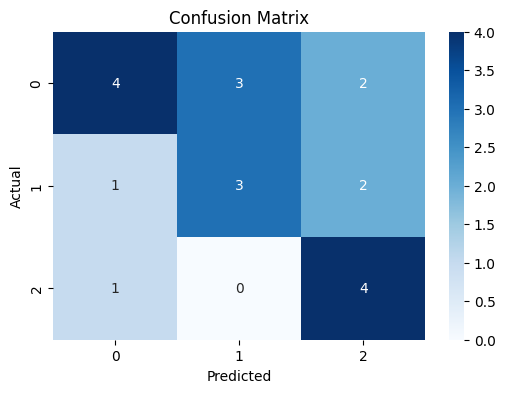

In [74]:
# STEP 10: Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

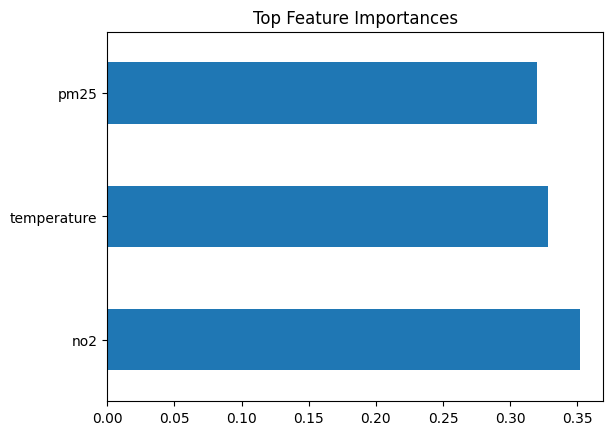

In [34]:
# STEP 11: Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()